In [1]:
import os
import cv2
import pandas as pd
import json
import numpy as np
import random
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# echo "export SIMEPU_DATA='/home/maparla/DeepLearning/Datasets/SIMEPU'" >> ~/.bashrc
SIMEPU_DATA_PATH = os.environ.get('SIMEPU_DATA')

In [3]:
# Vamos a crear un diccionario con la forma {"Label":Target} -> {"Hueco":0}
labels2targets = {}

In [4]:
SIMEPU_DF = pd.DataFrame(columns=['path', 'target'])

In [5]:
for subdir, dirs, files in os.walk(SIMEPU_DATA_PATH):
    for file in files:
        if ".jpg" in file:
            clase = subdir.split("/")[-1]

            if clase in labels2targets:
                label = labels2targets[clase]
            else:
                label = len(labels2targets)
                labels2targets[clase] = label

            filepath = subdir + os.sep + file

            SIMEPU_DF.loc[len(SIMEPU_DF)] = [filepath, label]

In [6]:
labels2targets

{'Alcantarillado': 8,
 'Grietas en forma de piel de cocodrilo': 7,
 'Grietas longitudinales': 5,
 'Grietas transversales': 3,
 'Huecos': 4,
 'Marca vial': 1,
 'Meteorización y desprendimiento': 6,
 'Parcheo': 0,
 'Sin daño': 2}

In [7]:
targets2labels = {v: k for k, v in labels2targets.items()}
targets2labels

{0: 'Parcheo',
 1: 'Marca vial',
 2: 'Sin daño',
 3: 'Grietas transversales',
 4: 'Huecos',
 5: 'Grietas longitudinales',
 6: 'Meteorización y desprendimiento',
 7: 'Grietas en forma de piel de cocodrilo',
 8: 'Alcantarillado'}

In [8]:
with open(os.path.join(SIMEPU_DATA_PATH, "labels2targets.pkl"), 'wb') as f:
    pickle.dump(labels2targets, f, pickle.HIGHEST_PROTOCOL)

In [9]:
with open(os.path.join(SIMEPU_DATA_PATH, "targets2labels.pkl"), 'wb') as f:
    pickle.dump(targets2labels, f, pickle.HIGHEST_PROTOCOL)

In [10]:
SIMEPU_DF.to_csv(os.path.join(SIMEPU_DATA_PATH, "data_paths.csv"), index=False)

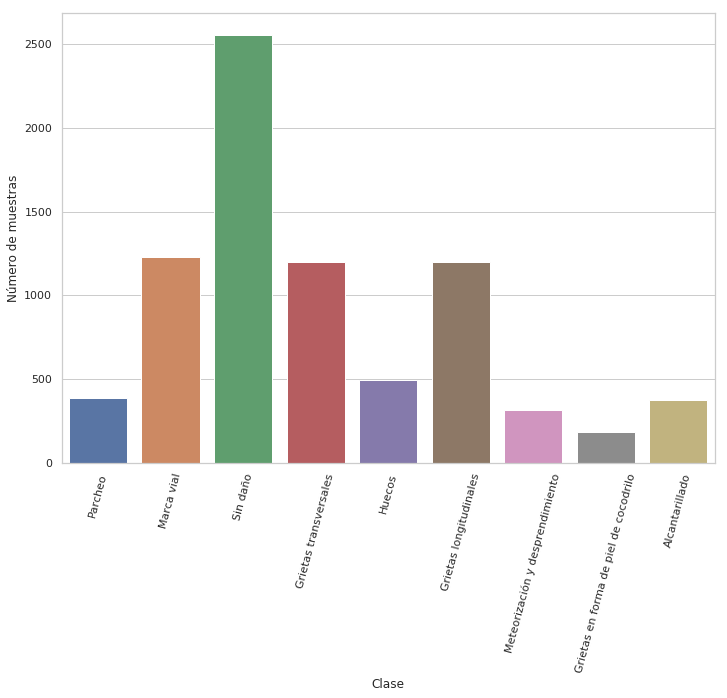

In [11]:
sns.set(style="whitegrid")
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.countplot(ax=ax, x="target", data=SIMEPU_DF.replace({"target": targets2labels}))
ax.set_xticklabels(ax.get_xticklabels(),rotation=75)
plt.xlabel("Clase")
plt.ylabel("Número de muestras")
plt.savefig("countplot.jpg", bbox_inches="tight")